In [903]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import iqr
import pandas as pd
import random

In [904]:
# Read in data
data = pd.read_csv('labels.txt')
len(data)

152

In [905]:
data = data[data.ClusterSize>10]
len(data)

137

In [906]:
data = data.reindex(np.random.permutation(data.index))

cutoff = int(0.7*len(data))

train_data = data[:cutoff]
test_data = data[cutoff:]

In [907]:
X = np.array([data.MedLength,data.IqrAngle]).T
# X = data.Avglength.as_matrix().reshape(-1,1)
y = data.Label.as_matrix()

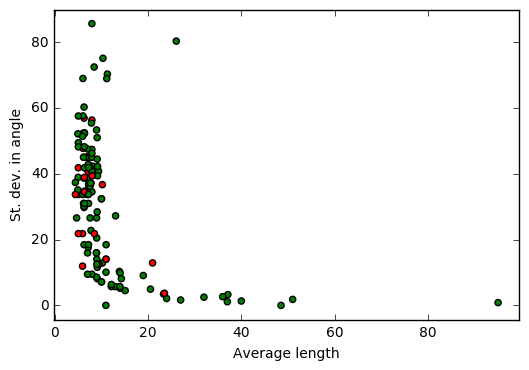

In [908]:
colors = ['g' if label else 'r' for label in data.Label]

plt.scatter(X[:,0],X[:,1],c=colors)
plt.axis('equal')
plt.xlabel('Average length')
plt.ylabel('St. dev. in angle')
# plt.plot([x_dec,x_dec],[np.min(data.Stdangle),np.max(data.Stdangle)])
plt.axis('tight')
plt.show()

In [909]:
X_train = np.array([train_data.MedLength,train_data.IqrAngle]).T
X_test = np.array([test_data.MedLength,test_data.IqrAngle]).T
y_train = train_data.Label.as_matrix()
y_test = test_data.Label.as_matrix()

In [910]:
# DO KNN
from sklearn.neighbors import KNeighborsClassifier

In [911]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [912]:
# Prediction
y_pred_train = neigh.predict(X_train)
y_pred_test = neigh.predict(X_test)

In [913]:
train_err = float(sum(y_pred_train==y_train))/len(y_train)
test_err = float(sum(y_pred_test==y_test))/len(y_test)
print train_err
print test_err

0.852631578947
0.904761904762


In [914]:
y_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [915]:
y_pred_test

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [916]:
# NEED TO COMPUTE specificity and sensitivity


In [917]:
P = np.where(y_test==1)[0]
N = np.where(y_test==0)[0]

P_pred = np.where(y_pred_test==1)[0]
N_pred = np.where(y_pred_test==0)[0]

TP = float(len(np.intersect1d(P,P_pred)))
TN = float(len(np.intersect1d(N,N_pred)))
FP = float(len(np.intersect1d(N,P_pred)))
FN = float(len(np.intersect1d(P,N_pred)))

prec = TP/(TP+FP)
recall = TP/(TP+FN)


Fscore = 2*prec*recall/(prec + recall)
acc = (TP + TN)/(TP + TN + FP + FN)

print prec
print recall # note: this is unbalanced by many more positive than negative examples
print Fscore
print acc


0.90243902439
1.0
0.948717948718
0.904761904762


In [922]:
#high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

In [897]:
len(P)

34

In [918]:
# NEED MORE NEGATIVE EXAMPLES

In [919]:
# Training error and test error as a function of n_neighbors

In [920]:
# Pick number of neigbors using cross-validation

In [921]:

# # SVM

# from sklearn.svm import SVC

# clf = SVC()
# model = clf.fit(X, y) 

# # decision boundary for just length
# xx = np.linspace(np.min(X),np.max(X),100)

# pred_prev = 0
# for x in xx:
#     pred = clf.predict(x)
#     if pred[0] > pred_prev:
#         x_dec = x
#         break
#     pred_prev = pred

# predictions = clf.predict(X)

# colors = ['g' if label else 'r' for label in data.Label]

# plt.scatter(data.Avglength,data.Stdangle,c=colors)
# plt.axis('equal')
# plt.xlabel('Average length')
# plt.ylabel('St. dev. in angle')
# # plt.plot([x_dec,x_dec],[np.min(data.Stdangle),np.max(data.Stdangle)])
# plt.axis('tight')
# plt.show()